In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Using the KMeans from sklearn
from sklearn.cluster import KMeans

### 1.Open and display the image “dog.jpeg”. Convert the image in to numpy array,so that i can be   used in further processing

In [3]:
# Convert PIL image to array
img = Image.open("dogs.jpeg")
np_array = np.array(img)

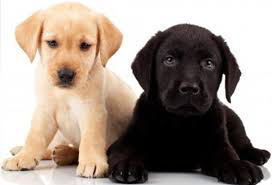

In [4]:
img

In [5]:
np_array

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

### 2. Find out the dimensions of the image and convert it in to a two-dimensional array.  

In [7]:
print("Array shape")
print(np_array.shape)

print("\nDimensions of the Image")
print("Height : " + str(img.height))
print("Width : " + str(img.width))

Array shape
(185, 272, 3)

Dimensions of the Image
Height : 185
Width : 272


In [8]:
# the array is 3 dimensions

In [9]:
# Reshape the array in 2 dimensions
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])

In [10]:
new_array.shape

(50320, 3)

### 3.Use kmeans clustering with k set to 3 and cluster the image 

In [12]:
# Initializing the k means
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

print("\nCluster centroids")
print(kmeans.cluster_centers_)

# count elements of each cluster
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())


Cluster centroids
[[210.60654796 174.78715024 143.65766801]
 [251.4718835  247.65766401 243.12239242]
 [ 29.50970635  21.57953738  20.47312298]]
Elements of Each cluster 
{0: 12215, 1: 19814, 2: 18291}
   col1  col2  col3  cluster
0   240   240   240        1
1   255   255   255        1
2   255   255   255        1
3   251   251   251        1
4   255   255   255        1


### 4. Predict the cluster label of every pixel in the image and plot it back as an image. 

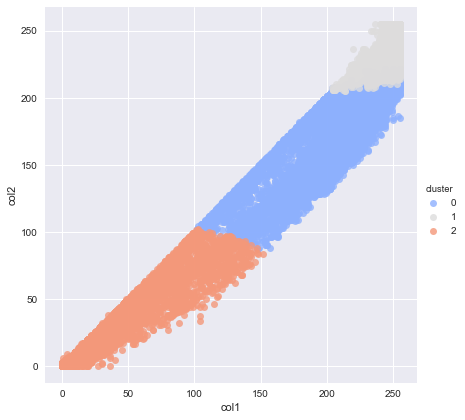

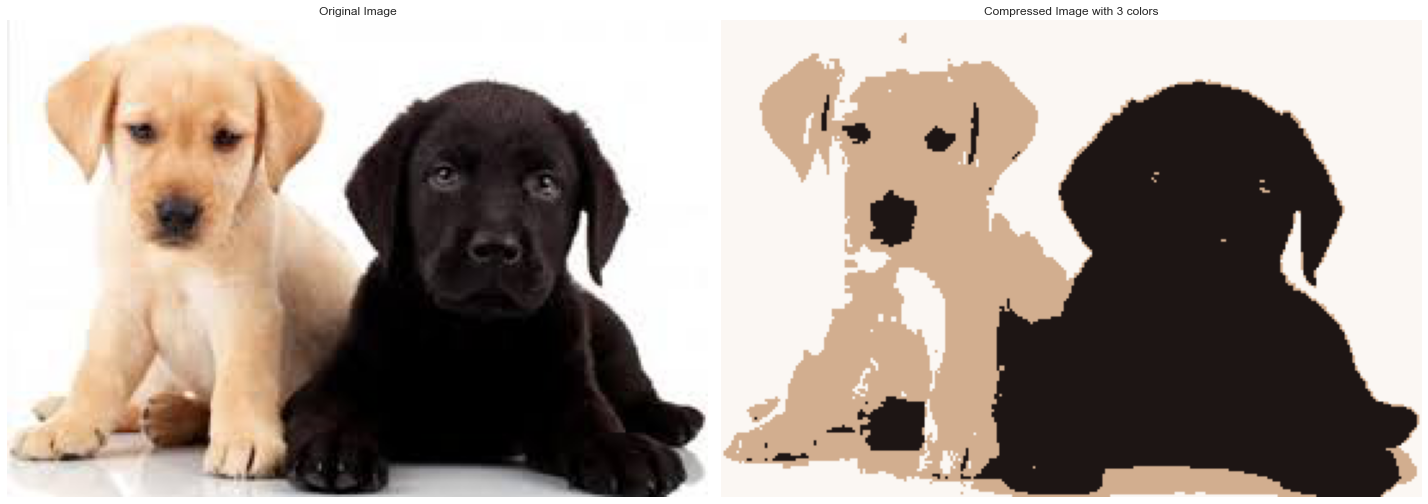

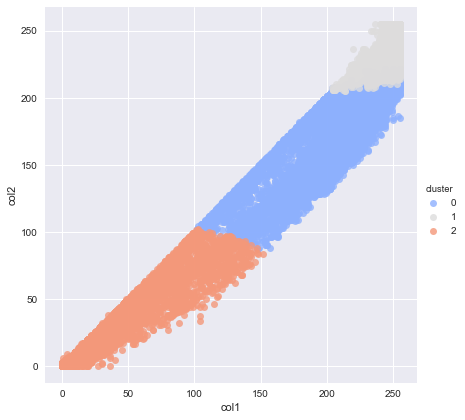

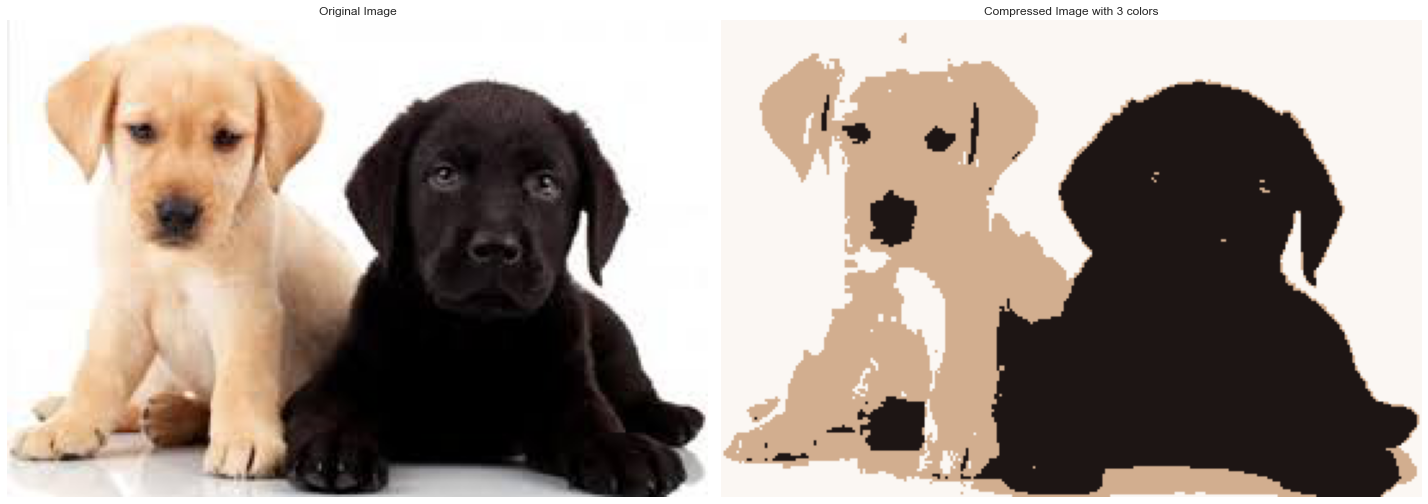

In [14]:
# Plot cluster points
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)


X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

###  5. Find out the three dominant color in the image.

In [16]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

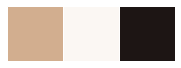

In [17]:
# Find Dominant color 
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()